Modules to import

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from skimage import io
from scipy.signal import find_peaks

Functions

In [95]:
def find_extrema(signal, min_prominence, min_distance):
    """Find indices of maxima, minima, and saddle points with stricter criteria."""
    # Detect maxima with prominence and distance thresholds
    maxima, _ = find_peaks(signal, prominence=min_prominence, distance=min_distance)
    
    # Detect minima by inverting the signal and applying the same peak-finding method
    minima, _ = find_peaks(-signal, prominence=min_prominence, distance=min_distance)
    return maxima, minima

def find_envelope(signal, extrema_indices):
    """Generate a cubic spline envelope from the given extrema indices."""
    extrema_values = signal[extrema_indices]
    return CubicSpline(extrema_indices, extrema_values, bc_type='natural')

Changing variables

In [96]:
image = io.imread('testcoin_crop.png', as_gray=True) # 2D image
image_signal = image[0,:]

Fixed variables

In [97]:
max_indices, min_indices = find_extrema(image_signal, min_prominence=0.1, min_distance=10)

max_envelope = find_envelope(image_signal,max_indices)
min_envelope = find_envelope(image_signal,min_indices)

time = np.arange(len(image_signal))

ValueError: `x` must contain at least 2 elements.

Plotting

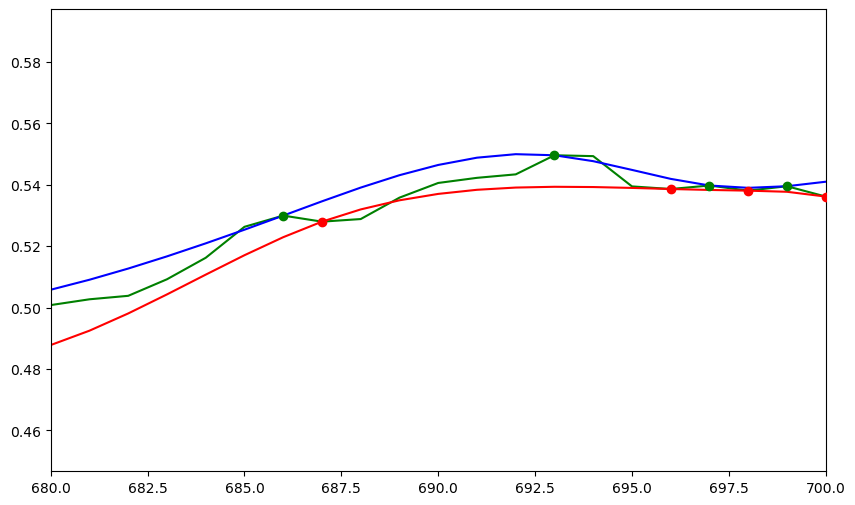

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time, image_signal, label='Original Signal', color='green')
plt.plot(time, max_envelope(time), label='Max Envelope', color='blue')
plt.plot(time, min_envelope(time), label='Min Envelope', color='red')   
plt.scatter(max_indices, image_signal[max_indices], color='green', zorder=5)
plt.scatter(min_indices, image_signal[min_indices], color='red', zorder=5)
plt.xlim(680,700)

plt.show()